# Introductory remarks

The tutorial takes the form of a Jupyter notebook for easier manipulation. Jupyter notebook feature-rich Python environement, and allow to complement Python code with text, images, links, $\LaTeX$ typestting... More informations on Jupyter can be found on the [Jupyter documentation][1] page.

The Jupyter notebook can be found in the Anaconda distribution. Anaconda includes Python and a comprehensive set of packages for data analysis, visualization, machine learning... It also includes a specific package manager called conda. The distribution can be downloaded on the [Anaconda individual edition][2] page.

The tutorial content is derived from the [MAD-X course][3] given at JUAS 2020 by G. Sterbini, A. Latina, H. Garcia Morales and N. Fuster Martinez. The tutorial notebook structure is derived from the [Optics design course][4] given at CAS 2019 by G. Sterbini, A. Latina and W. Herr. External packages available on the PyPI repository are required: [cpymad][6] and [PyNAFF][7]. A detailled installation procedure is given in the [CAS 2019 setup page][5].

To make things easier, we use [Binder][8] to provide a cloud based distribution of the notebooks. This will give a ready-to-go environement to execute the notebooks.


***
A very short summary of Jupyter notebook commands:

`Ctrl + Enter`: execute a cell<br>
`Ctrl + Shift + Enter`: execute a cell and go to next cell

***


# Practical work 1

In this first 4h tutorial, we will work with a basic FODO cell to manipulate the fundamental concepts of beam dynamics.<br>
We will cover the notions of:
- Twiss
- Phase advance
- Transfer matrix
- Thin lens approximation
- Stability criterion

[1]: <https://jupyter.org/documentation> "Jupyter documentation"
[2]: <https://www.anaconda.com/products/individual> "Anaconda Individual Edition"
[3]: <https://indico.cern.ch/event/850755/timetable/#302-introduction-to-mad-x> "JUAS 2020 MAD-X tuturial"
[4]: <https://indico.cern.ch/event/780638/contributions/3370309/> "CAS 2019 Optics design course"
[5]: <https://codimd.web.cern.ch/s/rJ8M7oBQN#Advanced-Accelerator-Physics-CAS-2019-Optics-Design> "Jupyter + MAD-X set-up"
[6]: <https://pypi.org/project/cpymad/> "cpymad package on PyPI"
[7]: <https://pypi.org/project/PyNAFF/> "PyNAFF package on PyPI"
[8]: <https://mybinder.org/> "Binder homepage"

# Preamble<a name="preamble"></a>

Import the required packages

In [1]:
import numpy as np
import scipy as sp
import copy

from cpymad.madx import Madx
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from IPython.display import display, Math, Markdown

from sympy import *
init_printing() 


# This functions will be used for the printing/plotting (nothing fundamental)
def showTunes():
    print(f'Q1 = {madx.table.summ.q1[0]:1.6}')
    print(f'Q2 = {madx.table.summ.q2[0]:1.6}')
    
def showChroma():
    print(f'DQ1 = {madx.table.summ.dq1[0]:1.6}')
    print(f'DQ2 = {madx.table.summ.dq2[0]:1.6}')

def plotLatticeSeries(ax, series, height=1., v_offset=0., color='r',alpha=0.5,lw=1):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-aux.l, v_offset-height/2.),   # (x,y)
        aux.l,          # width
        height,          # height
        color=color, alpha=alpha,lw=lw
    )
    )
    return

***
# A first FODO cell

Create a FODO cell with following parameters:
- Cell length: $L_{cell} = 10 m$ (variable ```l_cell```)
- One focusing (F) quadrupole and one defocusing (D) quadrupole of length $L_{quad} = 10 mm$ (variable ```quadrupoleLength```).
- Their focal length is $|f|=10m$
- An ```electron``` beam of $500 MeV$ energy is used (warning: MAD-X energy unit is the GeV)

In [8]:
######################
# MODIFY HERE        #
# FODO CELL ELEMENTS #
######################
l_cell = 10
quadrupoleLength = 1e-2

qf_position = 0
qd_position = 5

f = 10
myKf =  1/(  f  * quadrupoleLength) # For a focusing quadrupole, f>0
myKd =  1/((-f) * quadrupoleLength) # For a defocusing quadrupole, f<0 

particle = 'electron'
energy = 0.5 # Energy is in GeV

#####################
# END OF DEFINITION #
#####################

# The Mad-X code
myString=f'''
! *********************************************************************
! First part
! *********************************************************************

! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell={l_cell: .3f};
quadrupoleLength={quadrupoleLength: .3f};
f={f: .3f};
myKf:={myKf: .3f};// m^-2
myKd:={myKd: .3f};// m^-2

! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLength, K1:=myKf;
QD: quadrupole, L=quadrupoleLength, K1:=myKd;


! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at={qf_position: .3f};
quadrupole2: QD, at={qd_position: .3f};
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle={particle}, energy={energy: .2f};

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;
'''

myTwiss='''
! *********************************************************************
! TWISS
! *********************************************************************

title, 'First FODO cell, thin elements';
twiss, file=FODO1_thin_elements.twiss;
'''

# Assemble the input and the Twiss command, and run MAD-X
madx = Madx()
madx.input(myString+myTwiss);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.01.19 10:57:29      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.08037581424     -0.08212884083        25.82391785                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.08037581424 

               dq2            betymax              dymax              dyrms 
    -0.08212884083        25.82391785                  0                  0 

            ycomax             ycorms             deltap 

In [9]:
# We put the Mad-X twiss output in a Pandas DataFrame for easier manipulation
my_Twiss_df = madx.table.twiss.dframe()

In [10]:
# Modify the Twiss to interpolate inside the elements, and have nicer plots (the physics should not change!)
myTwiss='''
! *********************************************************************
! TWISS
! *********************************************************************
select,flag=interpolate, class=drift, slice=10, range=#s/#e;
select,flag=interpolate, class=quadrupole, slice=10, range=#s/#e;
select,flag=interpolate, class=sbend, slice=10, range=#s/#e;

twiss;
'''
madx = Madx()
madx.input(myString+myTwiss)

# The resulting Twiss table is stored in a separate DataFrame
my_HR_Twiss_df=madx.table.twiss.dframe() # HR stands for High Resolution in the s-direction


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.01.19 10:57:31      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.08037581424     -0.08212884083        25.83037393                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.08037581424 

               dq2            betymax              dymax              dyrms 
    -0.08212884083        25.83037393                  0                  0 

            ycomax             ycorms             deltap 

We can now look at the values MAD-X gave us:

In [11]:
my_Twiss_df[['name','s','betx','bety']]

name      s       betx       bety
#s           mycell$start:1   0.00  25.823918  15.510198
quadrupole1   quadrupole1:1   0.01  25.823918  15.510198
drift_0[0]        drift_0:0   5.00  15.510198  25.823918
quadrupole2   quadrupole2:1   5.01  15.510198  25.823918
drift_1[0]        drift_1:0  10.00  25.823918  15.510198
#e             mycell$end:1  10.00  25.823918  15.510198

We plot the resulting Twiss functions. For this we use the ```my_HR_Twiss_df``` table which interpolates the Twiss values in all elements. 

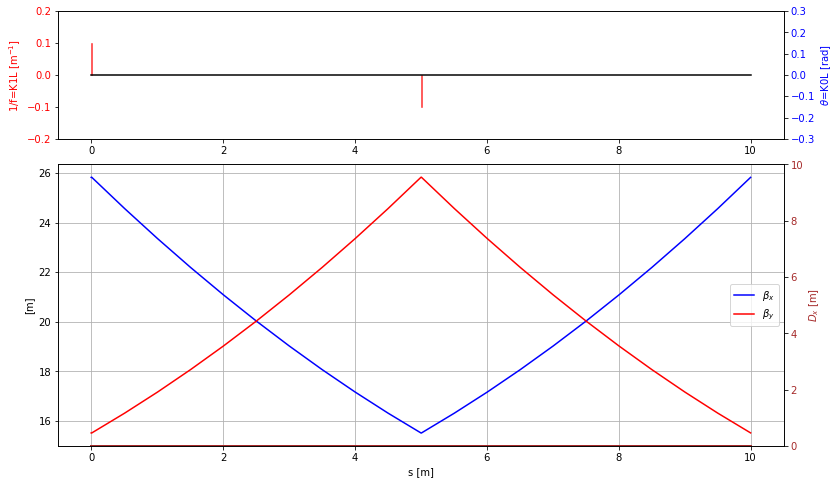

In [12]:
# Plot the results
fig = plt.figure(figsize=(13,8))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(my_Twiss_df['s'], 0*my_Twiss_df['s'],'k')

DF = my_Twiss_df[(my_Twiss_df['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux = DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF = my_Twiss_df[(my_Twiss_df['keyword']=='multipole')]
for i in range(len(DF)):
    aux = DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-.2,.2)
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)
ax2.tick_params(axis='y', labelcolor=color)

DF = my_Twiss_df[(my_Twiss_df['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k2l, v_offset=aux.k2l/2, color='y')

DF = my_Twiss_df[(my_Twiss_df['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.angle, v_offset=aux.angle/2, color='b')

    
plt.ylim(-.3,.3)

axbeta = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

plt.plot(my_HR_Twiss_df['s'], my_HR_Twiss_df['betx'], 'b', label='$\\beta_x$')
plt.plot(my_HR_Twiss_df['s'], my_HR_Twiss_df['bety'], 'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx() 
plt.plot(my_HR_Twiss_df['s'], my_HR_Twiss_df['dx'], 'brown', label='$D_x$', lw=2)
ax3.set_ylabel('$D_x$ [m]', color='brown')
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(0, 10);

## Phase advance of the cell

MAD-X provides us with some summary informations about the cell, but we can compute "by hand" the properties. The first one is the phase advance of the cell<br>
It can be computed from the formula $\mu(s) = \int_0^s \frac{1}{\beta(s)} ds$:

In [13]:
phase_advance = np.trapz(1/my_HR_Twiss_df['betx'], my_HR_Twiss_df['s'])

print(f'Phase advance per cell = {phase_advance: .4f}')

Phase advance per cell =  0.5051


***
Recall that for a periodic lattice, the Twiss matrix $M_{Twiss}$ is

$M_{Twiss} =
   \begin{bmatrix}
        \cos(\Delta \mu_L) + \alpha_0 \sin(\Delta \mu_L) & \beta_0 \sin(\Delta \mu_L) \\
        - \gamma_0 \sin(\Delta \mu_L) & \cos(\Delta \mu_L) - \alpha_0 \sin(\Delta \mu_L)
    \end{bmatrix}$
where $\Delta \mu_L$ is the phase advance over the lattice, $\alpha_0$, $\beta_0$, $\gamma_0$ are the Twiss parameters at a location $s_0$ of the lattice.

On the other hand, we can compute the FODO cell transfer matrix $M_{FODO}$.

In the thin-lens approximation, we can write the following approximations: $L_{drift} = L_{cell}/2$ 

$M_{FODO} = M_{O} M_{D} M_{O} M_{F} = 
   \begin{bmatrix}
        1 & L_{cell}/2 \\
        0 & 1
    \end{bmatrix}
   \begin{bmatrix}
        1    & 0 \\
        +1/f & 1
    \end{bmatrix}
   \begin{bmatrix}
        1 & L_{cell}/2 \\
        0 & 1
    \end{bmatrix}
   \begin{bmatrix}
        1    & 0 \\
        -1/f & 1
    \end{bmatrix}=
   \begin{bmatrix}
        1 - \frac{L_{cell}}{2f} - \frac{L^2}{4f^2}   & L_{cell} + \frac{L_{cell}^2}{4f} \\
        -\frac{L_{cell}}{2f^2}   & 1 + \frac{L_{cell}}{2f}
    \end{bmatrix}    $

Our FODO cell is periodic (we have the same Twiss function at the entry and exit): therefore $M_{Twiss} = M_{FODO}$. Therefore $\mathrm{Tr}(M_{Twiss}) = \mathrm{Tr}(M_{FODO})$ which gives

$2\cos\left(\Delta \mu_{L}\right) = 2 - \frac{L_{cell}^2}{4f^2}$

Remembering that $\cos(x) = 1 - 2\sin^2\left(\frac{x}{2}\right)$, we get

$\sin\left(\frac{\Delta \mu_L}{2}\right) = \pm \frac{L_{cell}}{4f}$

Compute the phase advance per cell using the thin lens approximation for a FODO lattice.
The numpy package provides most trigonometric functions such as `np.sin`...

In [14]:
phase_advance = 2*np.arcsin(l_cell/(4*f))

print(f'Phase advance per cell = {phase_advance: .4f}')

Phase advance per cell =  0.5054


We can compare it to the phase advance computed by MAD-X. (MAD-X provides the tune $Q_{x, y} = \frac{\Delta \mu_{x, y}}{2\pi}$, so we multiply the resut by $2\pi$)

In [15]:
print(f'MAD-X Horizontal phase advance: {madx.table.summ.Q1[0]*2*np.pi: .4f}\n')
print(f'MAD-X Vertical phase advance: {madx.table.summ.Q2[0]*2*np.pi: .4f}\n')

MAD-X Horizontal phase advance:  0.5050

MAD-X Vertical phase advance:  0.5050



Now try running MAD-X with:
- ```proton``` as particle type. What happens? Why?
    - The energy in MAD-X is the total energy of the particle $E = E_0 + E_{kin}$. Therefore for a proton beam the energy $E$ can not be smaller than $938 MeV$
    

- $f=2m$ for the quadrupole focal length. What happens? Why?

    - Remember the stability condition for a lattice with linear transfer map $M_{Twiss}$:
$|\mathrm{Tr}(M_{Twiss})| \leq 2$.<br>
Using $\mathrm{Tr}(M_{Twiss}) = \mathrm{Tr}(M_{FODO})$ we have $\mathrm{Tr}(M_{FODO}) = 2 - \frac{10^2}{4\times2^2} = -4.25$. The stability condition is not respected.

***
## Phase space ellipsis and beam enveloppe

Let's now look at the particle trajectory in phase space. The $(x, x')$ and $(y', y')$ phase spaces are equivalent, we will concentrate on $(x, x')$.
We will use the matrix formalism to track the particle tracjectories.

We will pass several times in the cell: the exit coordinate of the particle will be used as an entry cordinate. It is like if we had a 180 degree bend in each drift space.

We stay in the thin lens approximation for the matrices. With our FODO cell this means $L_{drift} = L_{cell}/2$

In [16]:
# Define numerically the FODO elements matrices
matrix_foc = np.array([[1,    0],
                       [-1/f, 1]])

matrix_defoc = np.array([[1,   0],
                         [1/f, 1]])

matrix_drift = np.array([[1,  l_cell/2],
                         [0,  1       ]])

# For the example, create the FODO matrix
one_turn_map = matrix_foc.dot(matrix_drift).dot(matrix_defoc).dot(matrix_drift)

The tracking function is defined below

In [17]:
# We now create a basic tracking routine through the FODO cell. Given the elements matrices, the initial particle coordiante
# in the (x, x') phase space and the number of times we will go through the cell (n_turns)
def track_particle_in_fodo(matrix_foc, matrix_defoc, matrix_drift,
                           initial_coordinate=np.array([1e-3, 0]), n_turns=1):
    '''
    Return a 4*2*n_turns array with the particle tracking results
    
    First axis gives the particle position at:
        - exit of the focusing quad,
        - entry of the defocusing quad
        - exit of the defocusing quad
        - entry of the focusing quad
    
    Second axis is for the particle x or x' coordinate
    
    Third axis is for the turn number of the tracking
    
    Inputs: 
    matrix_foc, matrix_defoc, matrix_drift: 2x2 numpy array
        Transfer matrices for the focusing, defocusing and drift elements of the FODO
    initial_coordiantes: 1x2 numpy array
        Initial coordinates of the particle in the (x, x') phase space
    n_turns: int
        Number of turns to track
    '''
    
    results_array = np.empty((4, 2, n_turns))
    
    # Put the initial particle coordinate in the results array
    results_array[0, :, 0] = initial_coordinate
    
    
    # Start the tracking
    for ix_turn in np.arange(0, n_turns):
        
        # We assume we start tracking at the exit of the foc: apply first
        # the drift matrix
        results_array[1, :, ix_turn] = np.dot(matrix_drift, results_array[0, :, ix_turn])
        # We are now at the entry of the defocusing quadrupole
        # We apply the defocusing quadrupole matrix
        results_array[2, :, ix_turn] = np.dot(matrix_defoc, results_array[1, :, ix_turn])
        # We are now at the exit of the defocusing quadrupole
        # We apply the drift matrix
        results_array[3, :, ix_turn] = np.dot(matrix_drift, results_array[2, :, ix_turn])
        # We are now at the entry of the focusing quadrupole
        # We apply the focusing quadrupole matrix
        # The results goes in the next turn index since we track from the exit of
        # the focusing quadrupole
        # We therefore need to handle the last turn to avoid an array overflow
        if ix_turn<n_turns-1:
            results_array[0, :, ix_turn+1] = np.dot(matrix_foc, results_array[3, :, ix_turn])
    
    return(results_array)

Now we provide to function the initial coordinate of the particle $\begin{pmatrix}x_0\\x'_0\end{pmatrix}$ and the number $N$ of turns we want to track.

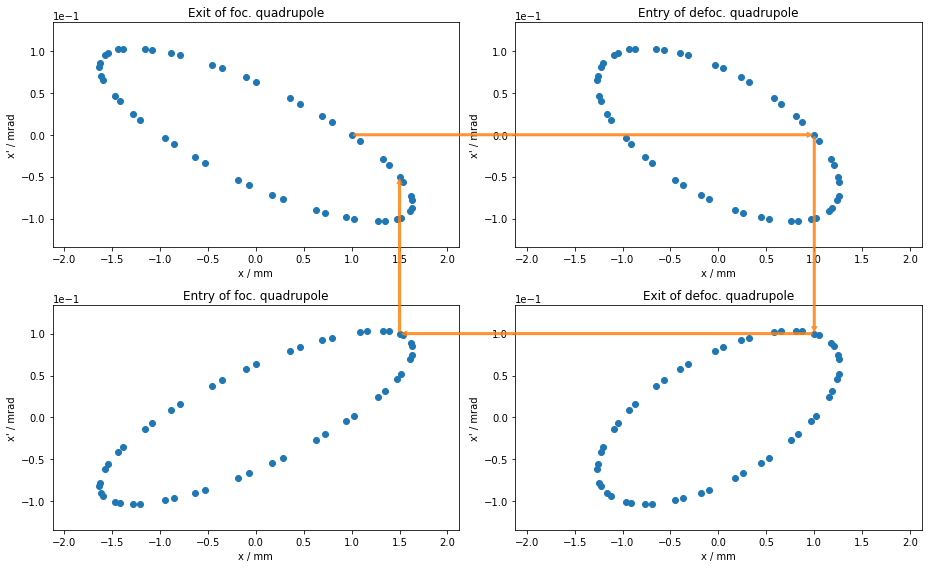

In [18]:
#########
# INPUT #
#########

# The particle initial coordinates in (x, x')
initial_coordinate=np.array([1e-3, 0])
# The number of turns to track
n_turns = 50
# In the plot, the number of arrows to show
n_iterations_to_show = 4


################
# END OF INPUT #
################

# We get the particle position for a certain number of turns
results_array = track_particle_in_fodo(matrix_foc, matrix_defoc, matrix_drift,
                           initial_coordinate=initial_coordinate, n_turns=n_turns)

fig, ax_list = plt.subplots(2, 2, figsize=(13, 8), squeeze=False)

ax_list = ax_list.flatten()

# Swap graph #3 and #4 so that the steps are presented clockwise and not left-to-right
ax_list[[2, 3]] = ax_list[[3, 2]]

xlim = np.array([-1.3, 1.3]) * np.max(results_array[:, 0, :])/1e-3
ylim = np.array([-1.3, 1.3]) * np.max(results_array[:, 1, :])/1e-3

title_list = ['Exit of foc. quadrupole',
              'Entry of defoc. quadrupole',
              'Exit of defoc. quadrupole',
              'Entry of foc. quadrupole',]

# Display the particle position at eah element
for ix_ax, ax in enumerate(ax_list):
    ax.plot(results_array[ix_ax, 0, :]/1e-3, results_array[ix_ax, 1, :]/1e-3, 'o')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.set_title(title_list[ix_ax])
    
    ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    
    ax.set_xlabel('x / mm')
    ax.set_ylabel('x\' / mrad')
    
fig.tight_layout()

# Display arrow to follow the particle position
for ix_iteration in range(0, n_iterations_to_show):

    arrow_start = np.array([results_array[np.mod(ix_iteration, 4), 0, np.floor_divide(ix_iteration, 4)],
                            results_array[np.mod(ix_iteration, 4), 1, np.floor_divide(ix_iteration, 4)]])/1e-3
    arrow_end = np.array([results_array[np.mod(ix_iteration+1, 4), 0, np.floor_divide(ix_iteration+1, 4)],
                          results_array[np.mod(ix_iteration+1, 4), 1, np.floor_divide(ix_iteration+1, 4)]])/1e-3
    
    # Create the arrow
    # https://www.cilyan.org/blog/2016/01/23/matplotlib-draw-between-subplots/
    # 1. Get transformation operators for axis and figure
    ax0tr = ax_list[np.mod(ix_iteration, 4)].transData # Axis 0 -> Display
    ax1tr = ax_list[np.mod(ix_iteration+1, 4)].transData # Axis 1 -> Display
    figtr = fig.transFigure.inverted() # Display -> Figure
    # 2. Transform arrow start point from axis 0 to figure coordinates
    ptB = figtr.transform(ax0tr.transform(arrow_start))
    # 3. Transform arrow end point from axis 1 to figure coordinates
    ptE = figtr.transform(ax1tr.transform(arrow_end))
    # 4. Create the patch
    arrow = patches.FancyArrowPatch(
        ptB, ptE, transform=fig.transFigure,  # Place arrow in figure coord system
        fc = 'C1', ec='C1', connectionstyle='arc3,rad=0', arrowstyle='simple', alpha = 0.8,
        mutation_scale = 10.
    )
    # # # 5. Add patch to list of objects to draw onto the figure
    fig.patches.append(arrow)

***
We are now going to visualize the particle trajectory along the lattice. For this, the tracking function defined above was slightly modified so that each drift is split in smaller drifts. This allows to interpolate the particle trajectories and have a nicer view.

In [19]:
def track_particle_in_split_fodo(matrix_foc, matrix_defoc, matrix_drift,
                                 initial_coordinate=np.array([1e-3, 0]), n_turns=10,
                                 n_split_drift=2):
    '''
    Return a (2+2*n_split_drift) * 2 * n_turns array with the particle tracking results
    
    First axis gives the particle position at:
        - exit of the focusing quad,
        - entry of the defocusing quad
        - exit of the defocusing quad
        - entry of the focusing quad
    
    Second axis is for the particle x or x' coordinate
    
    Third axis is for the turn number of the tracking
    
    Inputs: 
    matrix_foc, matrix_defoc, matrix_drift: 2x2 numpy array
        Transfer matrices for the focusing, defocusing and drift elements of the FODO
    initial_coordiantes: 1x2 numpy array
        Initial coordinates of the particle in the (x, x') phase space
    n_turns: int
        Number of turns to track
    n_split_drift: int
        Number of splits for each drift space. Used to interpolate the trajectory of tracked particles
    '''
    
    results_array = np.zeros(((2+2*n_split_drift) * (n_turns+1) + 1, 2))
    
    # We create a longitudinal position array for all the elements
    # This works in thin lens since we are going to fetch the length
    # in the elemenets matrices
    s_position_array = np.zeros((2+2*n_split_drift) * (n_turns+1) + 1)
    
    # Put the initial particle coordinate in the results array
    results_array[0, :] = initial_coordinate
    
    # Split the drift matrix
    matrix_split_drift = copy.deepcopy(matrix_drift)
    matrix_split_drift[0, 1] = matrix_split_drift[0, 1] / n_split_drift
    
    # Construct the list of elements in the FODO cell
    # First reapeat the splitted drifts
    one_turn_map = [matrix_split_drift for ix in range(n_split_drift)]
    # Append the defoc quadrupole matrix
    one_turn_map.extend([matrix_defoc])
    # Append again the splitted drifts
    one_turn_map.extend([matrix_split_drift for ix in range(n_split_drift)])
    # Finally the focusing quadrupole
    one_turn_map.extend([matrix_foc])
    
    
    # For each turn, we go through each element
    for ix_turn in np.arange(0, n_turns+1):
        for ix_element in np.arange(0, len(one_turn_map)):
            results_array[ix_element + ix_turn*len(one_turn_map) + 1, :] = np.dot(one_turn_map[ix_element],
                                                                                  results_array[ix_element + ix_turn*len(one_turn_map), :])
            s_position_array[ix_element + ix_turn*len(one_turn_map) + 1] = (s_position_array[ix_element + ix_turn*len(one_turn_map)] 
                                                                            + one_turn_map[ix_element][0, 1])
            
            
    results_array = np.asarray(results_array)
    # Remove the last element of the array, since it corresponds to a new turn
    results_array = results_array[:-1, :]
    
    results_array = results_array.reshape((n_turns+1, 2+2*n_split_drift, 2))
#     np.reshape(, ((2+2*n_split_drift), (n_turns+1)+1, 2))
    return(one_turn_map, s_position_array, results_array)

We now compute the particle trajectories for a certain initial particle coordiante and a certain number of turns

In [22]:
#########
# INPUT #
#########
n_turns = 10
initial_coordinate=np.array([1e-3, 0])

################
# END OF INPUT #
################

otm, s, particles = track_particle_in_split_fodo(matrix_foc, matrix_defoc, matrix_drift,
                                            initial_coordinate=initial_coordinate,
                                            n_turns=n_turns, n_split_drift=10)

Compute the Courant-Snyder invariant.

At a location $s$ in the accelerator, the Courant-Snyder invariant expression is
$J_x = \gamma(s)x(s) + 2 \alpha(s) x(s) x'(s) + \beta(s) x'(s)$

The maximal amplitude of the particle at a location $s$ is $\hat{x}(s) = \sqrt{\beta_x(s) J_x}$

Text(0.5, 1.0, 'Particle trajectory over multiple pass in the FODO cell')

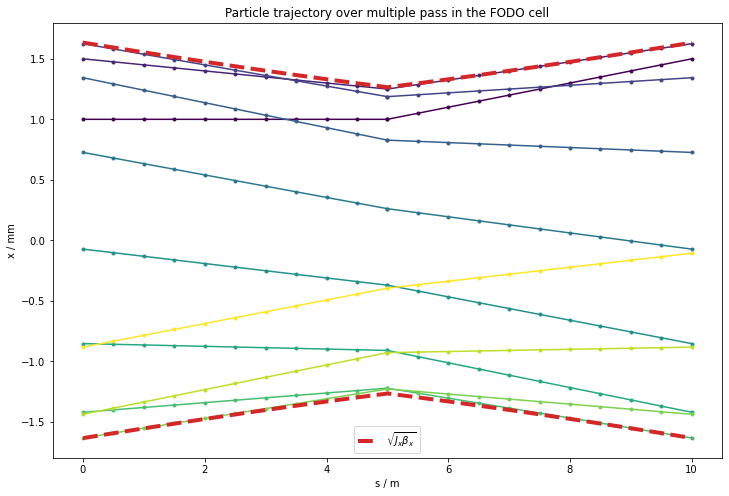

In [23]:
#########
# INPUT #
#########

# Our tracking started at the exit of the first quadrupole. We get the Twiss functions from the MAD-X table at this location
alpha_twiss = my_Twiss_df.loc['quadrupole1']['alfx']
beta_twiss = my_Twiss_df.loc['quadrupole1']['betx']
gamma_twiss = (1 + alpha_twiss**2)/beta_twiss

Jx = gamma_twiss * initial_coordinate[0]**2 + 2 * alpha_twiss * initial_coordinate[0] * initial_coordinate[1] + beta_twiss * initial_coordinate[1]**2

################
# END OF INPUT #
################

fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

colors = plt.cm.viridis(np.linspace(0, 1, n_turns+1))

for ix in np.arange(0, n_turns+1):
    ax1.plot(s[:particles.shape[1]], particles[ix, :, 0]*1e3, color=colors[ix], marker='.', linestyle='-')
    
    

ax1.plot(my_HR_Twiss_df['s'],  np.sqrt(my_HR_Twiss_df['betx']*Jx)*1e3, linestyle='--', lw=4, color='C3', label=r'$\sqrt{J_x \beta_x}$')
ax1.plot(my_HR_Twiss_df['s'], -np.sqrt(my_HR_Twiss_df['betx']*Jx)*1e3, linestyle='--', lw=4, color='C3')

ax1.set_xlabel('s / m')
ax1.set_ylabel('x / mm')

ax1.legend()

ax1.set_title('Particle trajectory over multiple pass in the FODO cell')

***
We tracked a single particle, now we will generate a distribution of particles in the $(x, x')$ phase space.
The covariance matrix of the beam is $\Sigma = 
\begin{bmatrix}
        \langle x^2 \rangle  & \langle xx' \rangle \\
        \langle xx' \rangle  & \langle x'^2 \rangle
    \end{bmatrix} =
\begin{bmatrix}
        \sigma_x^2  & \sigma_{x, x'} \\
        \sigma_{x, x'}  & \sigma_{x'}^2
    \end{bmatrix}
$<br>
If the generated beam has a bi-Gaussian distribution, then $\sigma_x$ and $\sigma_{x'}$ are the Gaussian distribution variance, and $\sigma_{x, x'}$ the covariance term.

Text(0.5, 1.0, 'Bi-Gaussian particle distribution')

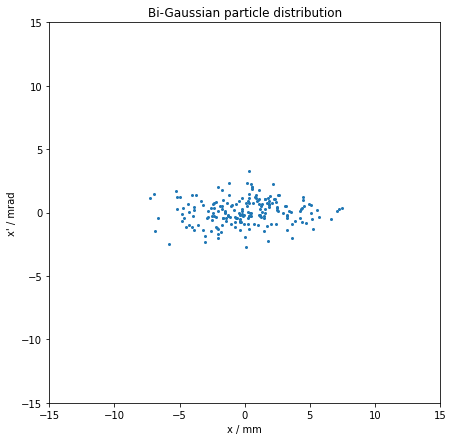

In [24]:
#########
# INPUT #
#########

sigma_x = 3e-3
sigma_xp = 1e-3
n_particles = 200

################
# END OF INPUT #
################

# First generate a particle distirbution


particle_distribution = np.random.normal(loc=0, scale=[sigma_x, sigma_xp], size=(n_particles,2))

axis_lims = np.max([sigma_x, sigma_xp]) * 5.0 * 1e3
fig, ax1 = plt.subplots(1, 1, figsize=(7,7))

ax1.scatter(particle_distribution[:, 0]/1e-3, particle_distribution[:, 1]/1e-3, s=4)

ax1.set_xlim([-axis_lims, axis_lims])
ax1.set_ylim([-axis_lims, axis_lims])

ax1.set_xlabel('x / mm')
ax1.set_ylabel('x\' / mrad')

ax1.set_title('Bi-Gaussian particle distribution')

In [25]:
# Compute numerically the covariance matrix
covariance_matrix = np.cov(particle_distribution.T)

print(covariance_matrix)

[[8.52462223e-06 2.46208778e-07]
 [2.46208778e-07 1.02321407e-06]]


The geometric emittance $\epsilon_x$ is equal to $\epsilon_x = \sqrt{\mathrm{det}(\Sigma)} = \sqrt{\sigma_x\sigma_{x'} - \sigma_{x, x'}^2}$  

In [26]:
emittance = np.sqrt(np.linalg.det(covariance_matrix))
print(f'Geometric emittance = {emittance:.2e} m rad')

Geometric emittance = 2.94e-06 m rad


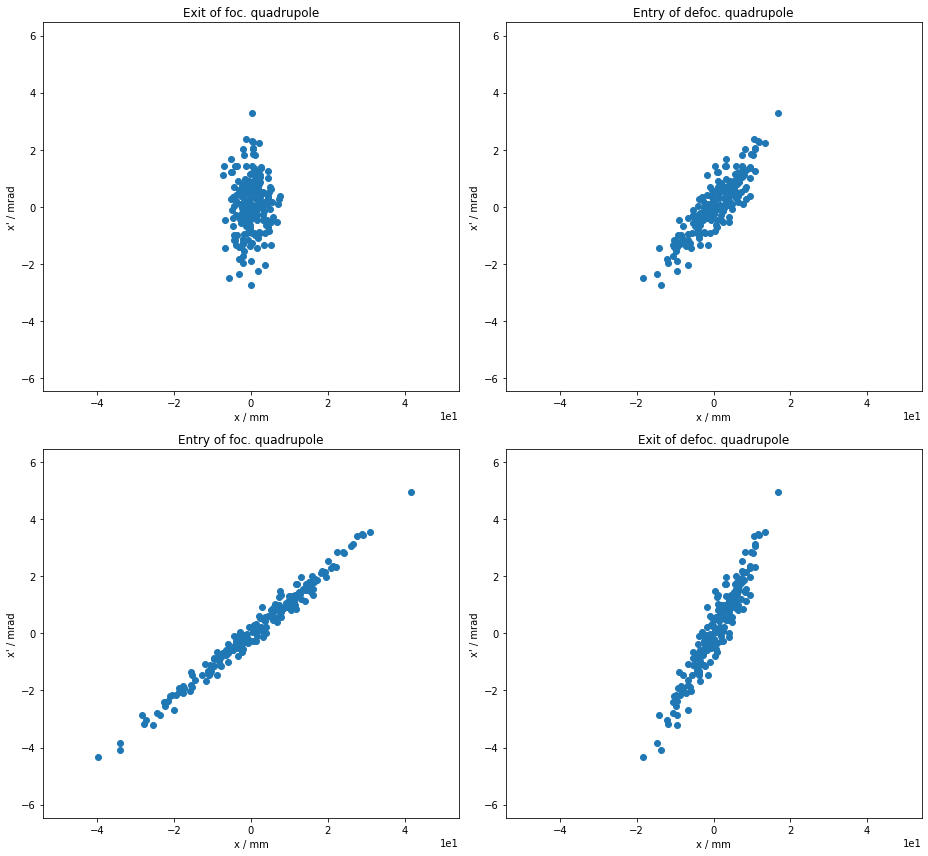

In [27]:
#########
# INPUT #
#########

initial_coordinate=np.array([1e-3, 0])
n_turns = 1
n_iterations_to_show = 1

################
# END OF INPUT #
################


# We get the particle position for a certain number of turns
results_array_particle_distribution = []
for ii_particle in range(0, len(particle_distribution)):
    results_array = track_particle_in_fodo(matrix_foc, matrix_defoc, matrix_drift,
                               initial_coordinate=particle_distribution[ii_particle, :], n_turns=n_turns)
    results_array_particle_distribution.append(results_array)
    
results_array_particle_distribution = np.array(results_array_particle_distribution)

fig, ax_list = plt.subplots(2, 2, figsize=(13, 12), squeeze=False)

ax_list = ax_list.flatten()

# Swap graph #3 and #4 so that the steps are presented clockwise and not left-to-right
ax_list[[2, 3]] = ax_list[[3, 2]]

x_max = np.max(results_array_particle_distribution[:, :, 0, :])
xp_max = np.max(results_array_particle_distribution[:, :, 1, :])

xlim = np.array([-1.3, 1.3]) * x_max/1e-3
ylim = np.array([-1.3, 1.3]) * xp_max/1e-3

title_list = ['Exit of foc. quadrupole',
              'Entry of defoc. quadrupole',
              'Exit of defoc. quadrupole',
              'Entry of foc. quadrupole',]

for ii_particle in range(0, len(particle_distribution)):
    results_array = results_array_particle_distribution
    for ix_ax, ax in enumerate(ax_list):
        ax.plot(results_array_particle_distribution[ii_particle,ix_ax, 0, :]/1e-3,
                results_array_particle_distribution[ii_particle,ix_ax, 1, :]/1e-3, 'o', color='C0')

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        ax.set_title(title_list[ix_ax])

        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

        ax.set_xlabel('x / mm')
        ax.set_ylabel('x\' / mrad')

        
# On each figure, plot the emmitance ellipsis
        
from matplotlib.patches import Ellipse

ax1.add_artist(Ellipse((0, 0), 1, 1))

fig.tight_layout()

***
# Thick quadrupoles

We will now illustrate the case of thick quadrupoles, and see if our approximations hold. We still have the relation $f = \frac{1}{KL_{quad}}$ (with $K>0$ for a focusing quadrupole and $K<0$ for a defocusing quadrupole).

In [30]:
######################
# MODIFY HERE        #
# FODO CELL ELEMENTS #
######################
l_cell = 10
quadrupoleLength = 1

qf_position = 0
qd_position = 5

f = 10
myKf =  1/(  f  * quadrupoleLength)
myKd =  1/((-f) * quadrupoleLength)

particle = 'electron'
energy = 0.5 # Energy is in GeV

#####################
# END OF DEFINITION #
#####################



# The Mad-X code
madx = Madx()
myString=f'''
! *********************************************************************
! First part
! *********************************************************************

! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell={l_cell: .3f};
quadrupoleLength={quadrupoleLength: .3f};
f={f: .3f};
myKf:={myKf: .3f};// m^-2
myKd:={myKd: .3f};// m^-2

! *********************************************************************
! Definition of magnet
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLength, K1:=myKf;
QD: quadrupole, L=quadrupoleLength, K1:=myKd;


! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at={qf_position: .3f};
quadrupole2: QD, at={qd_position: .3f};
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle={particle}, energy={energy: .2f};

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;
'''

myTwiss='''
! *********************************************************************
! TWISS
! *********************************************************************

title, 'Second FODO cell, thick elements';
twiss, file=FODO2_thick_elements.twiss;
'''

# Assemble the input and the Twiss command, and run MAD-X
madx = Madx()
madx.input(myString+myTwiss);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.01.19 11:06:09      +
  ++++++++++++++++++++++++++++++++++++++++++++

  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.01.19 11:06:10      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.07476465779     -0.07616344836        26.35921656                  0 

             dxrms             xcomax             xcorms                 q2 
       

In [31]:
myString='''
value, table(SUMM,Q1);
value, table(SUMM,betymax);
'''
madx.input(myString);

# Put the Mad-X twiss output in a Pandas DataFrame for easier manipulation
my_Twiss_df = madx.table.twiss.dframe()
# myDF[['name','s','betx','bety']]

table( summ q1 )   =      0.07476465779 ;
table( summ betymax ) =        26.35921656 ;


In [32]:
# Append some lines to the MAD-X input to interpolate Twiss values inside elements
madx.input('''
select,flag=interpolate, class=drift, slice=20, range=#s/#e;
select,flag=interpolate, class=quadrupole, slice=20, range=#s/#e;
select,flag=interpolate, class=sbend, slice=10, range=#s/#e;
twiss;
'''
)
# The resulting Twiss table is stored in a separate DataFrame
my_HR_Twiss_df=madx.table.twiss.dframe() # HR stands for High Resolution in the s-direction

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
     0.07476465779     -0.07616344836        27.01992877                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.07476465779 

               dq2            betymax              dymax              dyrms 
    -0.07616344836        27.01992877                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

           synch_6            

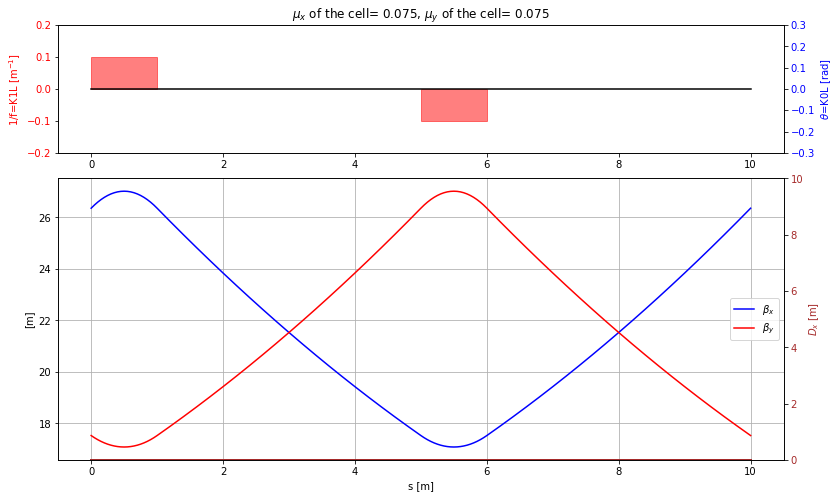

In [33]:
# just plotting
fig = plt.figure(figsize=(13,8))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(my_Twiss_df['s'],0*my_Twiss_df['s'],'k')

DF = my_Twiss_df[(my_Twiss_df['keyword']=='quadrupole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')
    
DF = my_Twiss_df[(my_Twiss_df['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k1l, v_offset=aux.k1l/2, color='r')

color = 'red'
ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(-.2,.2)
plt.title(f'$\\mu_x$ of the cell={madx.table.summ.Q1[0]: 2.3f}, \
$\\mu_y$ of the cell={madx.table.summ.Q2[0]: 2.3f}')
ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)
ax2.tick_params(axis='y', labelcolor=color)

DF = my_Twiss_df[(my_Twiss_df['keyword']=='multipole')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.k2l, v_offset=aux.k2l/2, color='y')

DF = my_Twiss_df[(my_Twiss_df['keyword']=='sbend')]
for i in range(len(DF)):
    aux=DF.iloc[i]
    plotLatticeSeries(plt.gca(),aux, height=aux.angle, v_offset=aux.angle/2, color='b')

    
plt.ylim(-.3,.3)

axbeta = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2, sharex=ax1)

plt.plot(my_HR_Twiss_df['s'],my_HR_Twiss_df['betx'],'b', label='$\\beta_x$')
plt.plot(my_HR_Twiss_df['s'],my_HR_Twiss_df['bety'],'r', label='$\\beta_y$')
plt.legend(loc='best')
plt.ylabel('[m]')
plt.xlabel('s [m]')
plt.grid()

ax3 = plt.gca().twinx() 
plt.plot(my_HR_Twiss_df['s'],my_HR_Twiss_df['dx'],'brown', label='$D_x$', lw=2)
ax3.set_ylabel('$D_x$ [m]', color='brown')
ax3.tick_params(axis='y', labelcolor='brown')
plt.ylim(0, 10);

We compute the phase advance per cell from the FODO cell formula seen above

In [34]:
phase_advance = 2*np.arcsin(l_cell/(4*f))

print(f'Phase advance per cell = {phase_advance: .3f}')

Phase advance per cell =  0.505


And compare it to the phase advance computed from the formula $\mu(s) = \int_0^s \frac{1}{\beta(s)} ds$

In [35]:
phase_advance = np.trapz(1/my_HR_Twiss_df['betx'], my_HR_Twiss_df['s'])

print(f'Phase advance per cell = {phase_advance: .4f}')

Phase advance per cell =  0.4698


We compare it to the phase advance computed by MAD-X

In [36]:
print(f'MAD-X Horizontal phase advance: {madx.table.summ.Q1[0] * 2 * np.pi: 2.3f}\n')
print(f'MAD-X Vertical phase advance: {madx.table.summ.Q2[0] * 2 * np.pi: 2.3f}\n')

MAD-X Horizontal phase advance:  0.470

MAD-X Vertical phase advance:  0.470



We can see that the thin-lens approximation and MAD-X results don't agree. In this example the quadrupoles are so long that the particle is not only receiving a transverse kick, it also drifts inside the element. To compute the phase advance using the matrix formailsm, we need the full transfer matrices fro the elements.

We use the ```sympy``` package to handle symbolic computations

In [37]:
kquad, lquad, ldrift = symbols(('K_1', 'L_{quad}', 'L_{drift}'))

In [38]:
matrix_full_foc   = Matrix([[cos(sqrt(kquad)*lquad),                1/sqrt(kquad) * sin(sqrt(kquad)*lquad)],
                            [-sqrt(kquad) * sin(sqrt(kquad)*lquad), cos(sqrt(kquad)*lquad)]])


matrix_full_defoc = Matrix([[cosh(sqrt(kquad)*lquad),               1/sqrt(kquad) * sinh(sqrt(kquad)*lquad)],
                            [sqrt(kquad) * sinh(sqrt(kquad)*lquad), cosh(sqrt(kquad)*lquad)]])

matrix_drift = Matrix([[1, ldrift],
                       [0, 1]])

display(matrix_full_foc)
display(matrix_full_defoc)
display(matrix_drift)

⎡                                 ⎛  ____         ⎞⎤
⎢       ⎛  ____         ⎞      sin⎝╲╱ K₁ ⋅L_{quad}⎠⎥
⎢    cos⎝╲╱ K₁ ⋅L_{quad}⎠      ────────────────────⎥
⎢                                       ____       ⎥
⎢                                     ╲╱ K₁        ⎥
⎢                                                  ⎥
⎢   ____    ⎛  ____         ⎞     ⎛  ____         ⎞⎥
⎣-╲╱ K₁ ⋅sin⎝╲╱ K₁ ⋅L_{quad}⎠  cos⎝╲╱ K₁ ⋅L_{quad}⎠⎦

⎡                                  ⎛  ____         ⎞⎤
⎢       ⎛  ____         ⎞      sinh⎝╲╱ K₁ ⋅L_{quad}⎠⎥
⎢   cosh⎝╲╱ K₁ ⋅L_{quad}⎠      ─────────────────────⎥
⎢                                        ____       ⎥
⎢                                      ╲╱ K₁        ⎥
⎢                                                   ⎥
⎢  ____     ⎛  ____         ⎞      ⎛  ____         ⎞⎥
⎣╲╱ K₁ ⋅sinh⎝╲╱ K₁ ⋅L_{quad}⎠  cosh⎝╲╱ K₁ ⋅L_{quad}⎠⎦

⎡1  L_{drift}⎤
⎢            ⎥
⎣0      1    ⎦

With the element matrices defined, ```sympy``` can compute the linear transfer map for the FODO cell

In [39]:
fodo_matrix = matrix_full_foc*matrix_drift*matrix_full_defoc*matrix_drift


display(fodo_matrix)

⎡               ⎛                                    ⎛  ____         ⎞⎞       
⎢          ____ ⎜             ⎛  ____         ⎞   sin⎝╲╱ K₁ ⋅L_{quad}⎠⎟     ⎛ 
⎢        ╲╱ K₁ ⋅⎜L_{drift}⋅cos⎝╲╱ K₁ ⋅L_{quad}⎠ + ────────────────────⎟⋅sinh⎝╲
⎢               ⎜                                          ____       ⎟       
⎢               ⎝                                        ╲╱ K₁        ⎠       
⎢                                                                             
⎢  ____ ⎛    ____              ⎛  ____         ⎞      ⎛  ____         ⎞⎞     ⎛
⎣╲╱ K₁ ⋅⎝- ╲╱ K₁ ⋅L_{drift}⋅sin⎝╲╱ K₁ ⋅L_{quad}⎠ + cos⎝╲╱ K₁ ⋅L_{quad}⎠⎠⋅sinh⎝

                                                                              
 ____         ⎞      ⎛  ____         ⎞     ⎛  ____         ⎞                  
╱ K₁ ⋅L_{quad}⎠ + cos⎝╲╱ K₁ ⋅L_{quad}⎠⋅cosh⎝╲╱ K₁ ⋅L_{quad}⎠                  
                                                                              
                                                   

Recall that $\cos(\Delta \mu) = \frac{1}{2} \mathrm{Tr}(M_{FODO})$. We can now obtain the phase advance for the FODO cell using the transfer matrix we just computed:

In [40]:
mu_thick_lens = acos(1/2*fodo_matrix.trace())

l_drift = (l_cell - 2 * quadrupoleLength) / 2
phase_advance = mu_thick_lens.evalf(subs={kquad:myKf, lquad:quadrupoleLength, ldrift:l_drift})

print(f'Phase advance per cell = {phase_advance: .3f}')

Phase advance per cell =  0.470
